In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
def sokudo(rho):
    V = Vmax * (1 - rho/rho_max)
    return V

In [4]:
nx = 51
L = 11.0
dx = L / (nx - 1)
dt = 0.001
c = 1.0

x = numpy.linspace(0.0, L, num=nx)

In [5]:
rho0 = numpy.ones(nx)*20
rho0[10:20] = 50

(10.0, 60.0)

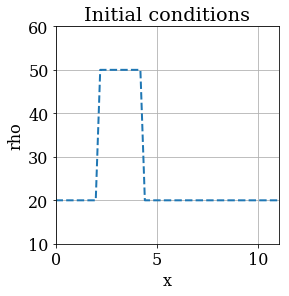

In [7]:
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('rho')
pyplot.grid()
pyplot.plot(x, rho0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(10.0, 60.0)

In [8]:
Vmax = 136
rho_max = 250
nt = 50
rho = rho0.copy()
for n in range(1, nt):
    rho[1:] = rho[1:] - Vmax * c * dt / dx * ((rho[1:] - rho[:-1]) - 1/rho_max * (rho[1:]**2 - rho[:-1]**2))

(10.0, 60.0)

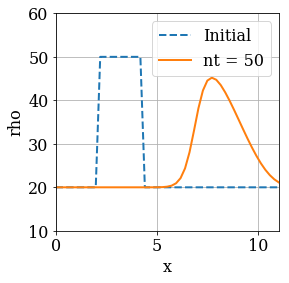

In [10]:
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('rho')
pyplot.grid()
pyplot.plot(x, rho0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, rho, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(10.0, 60.0)

In [11]:
sum = 0.0
for i in range(nx - 1):
    sum += sokudo(rho[i])
    
AV = sum / (nx-1) / 3.6
print(AV)

33.85620449759621


In [12]:
ind = numpy.argmax(rho)
print(rho[ind])
print(sokudo(rho[ind])/3.6)

45.20894652076375
30.946203636862368
